# Titanic dataset analysis using Pandas and Numpy

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from scipy import stats, integrate
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_csv('Titanic.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Exploration

In [67]:
#Function to create grouped data by factors
def grouped_by_factors(df,factor):
    mean_by_factor = df.groupby(factor).describe()
    return mean_by_factor

###  Understanding Dependent factor 'Survived'

In [7]:
grouped_by_factors(data,'Survived')

Age        Fare       Parch  PassengerId      Pclass  \
Survived                                                                      
0        count  424.000000  549.000000  549.000000   549.000000  549.000000   
         mean    30.626179   22.117887    0.329690   447.016393    2.531876   
         std     14.172110   31.388207    0.823166   260.640469    0.735805   
         min      1.000000    0.000000    0.000000     1.000000    1.000000   
         25%     21.000000    7.854200    0.000000   211.000000    2.000000   
         50%     28.000000   10.500000    0.000000   455.000000    3.000000   
         75%     39.000000   26.000000    0.000000   675.000000    3.000000   
         max     74.000000  263.000000    6.000000   891.000000    3.000000   
1        count  290.000000  342.000000  342.000000   342.000000  342.000000   
         mean    28.343690   48.395408    0.464912   444.368421    1.950292   
         std     14.950952   66.596998    0.771712   252.358840    0.863321   
         min      0.420000    0.000000    0.000000     2.000000    1.000000   
         25%     19.000000   12.475000    0.000000   250.750000    1.000000   
         50%     28.000000   26.000000    0.000000   439.500000    2.000000   
         75%     36.000000   57.000000    1.000000   651.500000    3.000000   
         max     80.000000  512.329200    5.000000   890.000000    3.000000   

                     SibSp  
Survived                    
0        count  549.000000  
         mean     0.553734  
         std      1.288399  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      8.000000  
1        count  342.000000  
         mean     0.473684  
         std      0.708688  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      4.000000

####  'Survived' by Age

Populating the interactive namespace from numpy and matplotlib


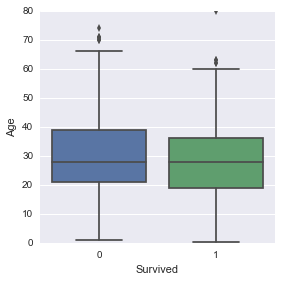

In [8]:
%pylab inline
sns.factorplot("Survived", y="Age", data=data, kind="box")

The data shows 549 passengers did not survive and 342 did. Average age of passengers that survived was 28.3(std=14.9) years as compared to 30.62(14.17) for those who did not survive.

####  'Survived' by Fare

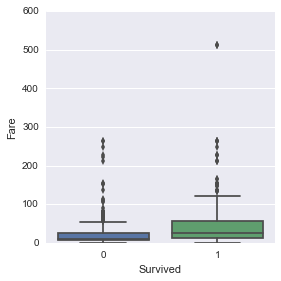

In [9]:
sns.factorplot("Survived", y="Fare", data=data, kind="box")

On average, passengers who survived paid higher fare(mean=48 dollars,std=31.4) as compared to who did not(mean=22.1 dollars, std=66.6) but the std dev of fare is also high. Fare difference indicates that Class1 is upper class with expensive tickets and Class3 is lower

### Understanding Sex as a factor

In [10]:
data.groupby('Sex').describe()

Age        Fare       Parch  PassengerId      Pclass  \
Sex                                                                         
female count  261.000000  314.000000  314.000000   314.000000  314.000000   
       mean    27.915709   44.479818    0.649682   431.028662    2.159236   
       std     14.110146   57.997698    1.022846   256.846324    0.857290   
       min      0.750000    6.750000    0.000000     2.000000    1.000000   
       25%     18.000000   12.071875    0.000000   231.750000    1.000000   
       50%     27.000000   23.000000    0.000000   414.500000    2.000000   
       75%     37.000000   55.000000    1.000000   641.250000    3.000000   
       max     63.000000  512.329200    6.000000   889.000000    3.000000   
male   count  453.000000  577.000000  577.000000   577.000000  577.000000   
       mean    30.726645   25.523893    0.235702   454.147314    2.389948   
       std     14.678201   43.138263    0.612294   257.486139    0.813580   
       min      0.420000    0.000000    0.000000     1.000000    1.000000   
       25%     21.000000    7.895800    0.000000   222.000000    2.000000   
       50%     29.000000   10.500000    0.000000   464.000000    3.000000   
       75%     39.000000   26.550000    0.000000   680.000000    3.000000   
       max     80.000000  512.329200    5.000000   891.000000    3.000000   

                   SibSp    Survived  
Sex                                   
female count  314.000000  314.000000  
       mean     0.694268    0.742038  
       std      1.156520    0.438211  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    1.000000  
       75%      1.000000    1.000000  
       max      8.000000    1.000000  
male   count  577.000000  577.000000  
       mean     0.429809    0.188908  
       std      1.061811    0.391775  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      0.000000    0.000000  
       max      8.000000    1.000000

Mean age of females who boarded the ship was 27-28 years and males was 30-31 years

####  'Survived' by Pclass and Sex

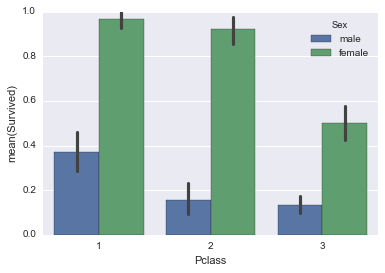

In [11]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=data);

There were 314 females and 577 males, mean for female survivors(mean=0.74,std= 0.44) is more than males(mean=0.19,std= 0.39) across all Pclasses, Survival has linear relationship with class

####  'Survived' by Fare and Sex

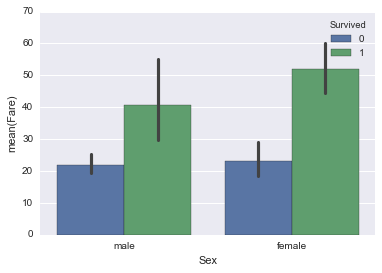

In [13]:
sns.barplot(x="Sex", y="Fare", hue="Survived", data=data);

Avg Fare of females was 44.47 and of males was 25.52. Males and Females survivors had higher mean fare

### Understanding Pclass as a factor

In [14]:
grouped_by_factors(data,'Pclass')

Age        Fare       Parch  PassengerId       SibSp  \
Pclass                                                                      
1      count  186.000000  216.000000  216.000000   216.000000  216.000000   
       mean    38.233441   84.154687    0.356481   461.597222    0.416667   
       std     14.802856   78.380373    0.693997   246.737616    0.611898   
       min      0.920000    0.000000    0.000000     2.000000    0.000000   
       25%     27.000000   30.923950    0.000000   270.750000    0.000000   
       50%     37.000000   60.287500    0.000000   472.000000    0.000000   
       75%     49.000000   93.500000    0.000000   670.500000    1.000000   
       max     80.000000  512.329200    4.000000   890.000000    3.000000   
2      count  173.000000  184.000000  184.000000   184.000000  184.000000   
       mean    29.877630   20.662183    0.380435   445.956522    0.402174   
       std     14.001077   13.417399    0.690963   250.852161    0.601633   
       min      0.670000    0.000000    0.000000    10.000000    0.000000   
       25%     23.000000   13.000000    0.000000   234.500000    0.000000   
       50%     29.000000   14.250000    0.000000   435.500000    0.000000   
       75%     36.000000   26.000000    1.000000   668.000000    1.000000   
       max     70.000000   73.500000    3.000000   887.000000    3.000000   
3      count  355.000000  491.000000  491.000000   491.000000  491.000000   
       mean    25.140620   13.675550    0.393075   439.154786    0.615071   
       std     12.495398   11.778142    0.888861   264.441453    1.374883   
       min      0.420000    0.000000    0.000000     1.000000    0.000000   
       25%     18.000000    7.750000    0.000000   200.000000    0.000000   
       50%     24.000000    8.050000    0.000000   432.000000    0.000000   
       75%     32.000000   15.500000    0.000000   666.500000    1.000000   
       max     74.000000   69.550000    6.000000   891.000000    8.000000   

                Survived  
Pclass                    
1      count  216.000000  
       mean     0.629630  
       std      0.484026  
       min      0.000000  
       25%      0.000000  
       50%      1.000000  
       75%      1.000000  
       max      1.000000  
2      count  184.000000  
       mean     0.472826  
       std      0.500623  
       min      0.000000  
       25%      0.000000  
       50%      0.000000  
       75%      1.000000  
       max      1.000000  
3      count  491.000000  
       mean     0.242363  
       std      0.428949  
       min      0.000000  
       25%      0.000000  
       50%      0.000000  
       75%      0.000000  
       max      1.000000

Mean Fare of Class 1 was 84.15 dollars, Class 2 was 20.66 dollars and Class 3 was 13.67 dollars. Mean 'Survived' shows direct correlation to Pclass- Class 3(0.24), Class 2(0.47), Class 1(0.63)

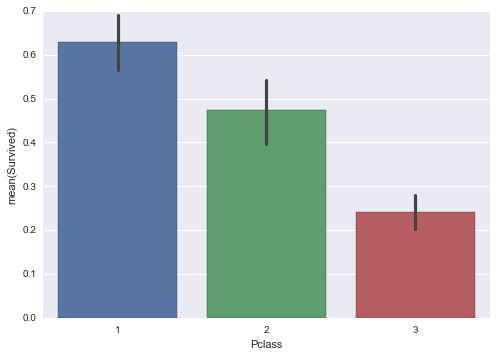

In [90]:
sns.barplot(x="Pclass", y="Survived", data=data);

####  Correlation of 'Survived' with Pclass and Sex

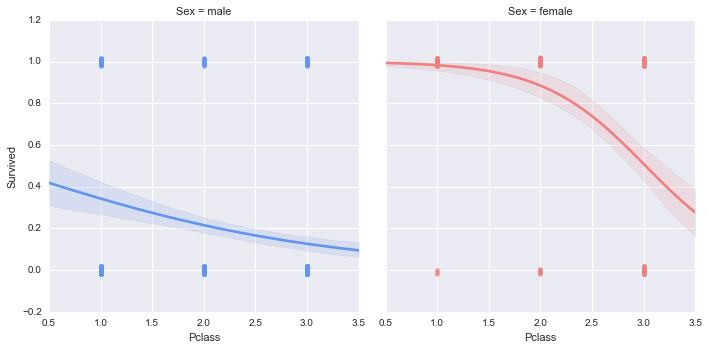

In [92]:
g = sns.lmplot(x="Pclass", y="Survived", col="Sex", hue="Sex", data=data, palette=pal, y_jitter=.02, logistic=True)

Survived showed negative correlation with Pclass, passengers with higher Pclass had lower survival probability. Overall, Females show higher correlation to Pclass as compared to men

### Understanding Parch/SibSp as a factor

In [16]:
print(grouped_by_factors(data,'Parch'))
print(grouped_by_factors(data,'SibSp'))

                    Age        Fare  PassengerId      Pclass       SibSp  \
Parch                                                                      
0     count  521.000000  678.000000   678.000000  678.000000  678.000000   
      mean    32.178503   25.586774   445.255162    2.321534    0.237463   
      std     12.570448   41.878786   256.163557    0.836665    0.496321   
      min      5.000000    0.000000     1.000000    1.000000    0.000000   
      25%     22.000000    7.854200   224.250000    2.000000    0.000000   
      50%     30.000000   10.500000   452.500000    3.000000    0.000000   
      75%     39.000000   26.000000   665.750000    3.000000    0.000000   
      max     80.000000  512.329200   891.000000    3.000000    3.000000   
1     count  110.000000  118.000000   118.000000  118.000000  118.000000   
      mean    24.422000   46.778180   465.110169    2.203390    1.084746   
      std     18.283117   63.709430   260.613602    0.832659    1.144114   
      min   

#### 'Survived' by SibSp/Parch

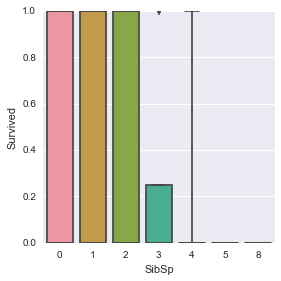

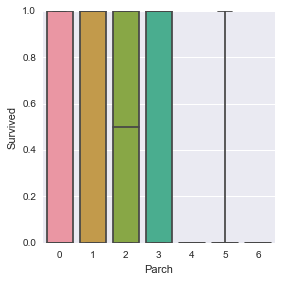

In [17]:
sns.factorplot("SibSp", y="Survived", data=data, kind="box")
sns.factorplot("Parch", y="Survived", data=data, kind="box")

Mean Survival rate for Sibling/spouse or parent/children doesn't show correlation with number of siblings/children etc. I will investigate now if having a parent or sibling affected survival irresective of the number of siblings/children/parents or spouse

In [18]:
data.loc[data['SibSp'] == 0, 'SibSp_y_n'] = False
data.loc[data['SibSp'] >0, 'SibSp_y_n'] = True
data.loc[data['Parch'] == 0, 'Parch_y_n'] = False
data.loc[data['Parch'] >0, 'Parch_y_n'] = True

I created a new columns SibSp_y_n and Parch_y_n to indicate 'True' if passenger had any number of sibling/parent/child/spouse and 'False' otherwise.

In [19]:
grouped_by_factors(data,'SibSp_y_n')

Age        Fare       Parch  PassengerId      Pclass  \
SibSp_y_n                                                                      
False     count  471.000000  608.000000  608.000000   608.000000  608.000000   
          mean    31.397558   25.692028    0.185855   455.370066    2.351974   
          std     13.647767   49.733052    0.585377   255.992322    0.824539   
          min      0.420000    0.000000    0.000000     3.000000    1.000000   
          25%     22.000000    7.795800    0.000000   232.750000    2.000000   
          50%     29.000000    9.500000    0.000000   461.500000    3.000000   
          75%     39.000000   26.000000    0.000000   678.500000    3.000000   
          max     80.000000  512.329200    5.000000   891.000000    3.000000   
True      count  243.000000  283.000000  283.000000   283.000000  283.000000   
          mean    26.407078   46.195040    0.802120   425.869258    2.215548   
          std     15.603758   46.710196    1.026111   259.565637    0.854383   
          min      0.670000    6.495800    0.000000     1.000000    1.000000   
          25%     16.000000   18.375000    0.000000   193.500000    1.000000   
          50%     26.000000   27.900000    1.000000   425.000000    2.000000   
          75%     37.000000   56.964600    1.000000   644.000000    3.000000   
          max     70.000000  263.000000    6.000000   889.000000    3.000000   

                      SibSp    Survived  
SibSp_y_n                                
False     count  608.000000  608.000000  
          mean     0.000000    0.345395  
          std      0.000000    0.475888  
          min      0.000000    0.000000  
          25%      0.000000    0.000000  
          50%      0.000000    0.000000  
          75%      0.000000    1.000000  
          max      0.000000    1.000000  
True      count  283.000000  283.000000  
          mean     1.646643    0.466431  
          std      1.407508    0.499756  
          min      1.000000    0.000000  
          25%      1.000000    0.000000  
          50%      1.000000    0.000000  
          75%      2.000000    1.000000  
          max      8.000000    1.000000

In [20]:
grouped_by_factors(data,'Parch_y_n')

Age        Fare       Parch  PassengerId      Pclass  \
Parch_y_n                                                                      
False     count  521.000000  678.000000  678.000000   678.000000  678.000000   
          mean    32.178503   25.586774    0.000000   445.255162    2.321534   
          std     12.570448   41.878786    0.000000   256.163557    0.836665   
          min      5.000000    0.000000    0.000000     1.000000    1.000000   
          25%     22.000000    7.854200    0.000000   224.250000    2.000000   
          50%     30.000000   10.500000    0.000000   452.500000    3.000000   
          75%     39.000000   26.000000    0.000000   665.750000    3.000000   
          max     80.000000  512.329200    0.000000   891.000000    3.000000   
True      count  193.000000  213.000000  213.000000   213.000000  213.000000   
          mean    23.006062   53.268154    1.596244   448.370892    2.267606   
          std     17.145160   64.656501    0.882954   261.701920    0.834816   
          min      0.420000    7.229200    1.000000     8.000000    1.000000   
          25%      7.000000   20.525000    1.000000   206.000000    2.000000   
          50%     22.000000   29.125000    1.000000   438.000000    3.000000   
          75%     36.000000   57.979200    2.000000   680.000000    3.000000   
          max     70.000000  512.329200    6.000000   889.000000    3.000000   

                      SibSp    Survived  
Parch_y_n                                
False     count  678.000000  678.000000  
          mean     0.237463    0.343658  
          std      0.496321    0.475279  
          min      0.000000    0.000000  
          25%      0.000000    0.000000  
          50%      0.000000    0.000000  
          75%      0.000000    1.000000  
          max      3.000000    1.000000  
True      count  213.000000  213.000000  
          mean     1.431925    0.511737  
          std      1.796568    0.501040  
          min      0.000000    0.000000  
          25%      0.000000    0.000000  
          50%      1.000000    1.000000  
          75%      2.000000    1.000000  
          max      8.000000    1.000000

Looking at the means, having a parent or child(0.511737) would increase probability of survival more than having a sibling or a spouse(0.466431). I combined the results from the two columns into new column SibSp_Parch which is True if either SibSp_y_n or Parch_y_n was True

In [21]:
data['SibSp_Parch'] = np.logical_or(data['SibSp_y_n'], data['Parch_y_n'])

In [22]:
grouped_by_factors(data,'SibSp_Parch')

Age        Fare       Parch  PassengerId  \
SibSp_Parch                                                          
False       count  404.000000  537.000000  537.000000   537.000000   
            mean    32.220297   21.242689    0.000000   458.000000   
            std     12.899871   42.223510    0.000000   255.714174   
            min      5.000000    0.000000    0.000000     3.000000   
            25%     22.000000    7.775000    0.000000   235.000000   
            50%     29.500000    8.137500    0.000000   466.000000   
            75%     39.000000   15.000000    0.000000   681.000000   
            max     80.000000  512.329200    0.000000   891.000000   
True        count  310.000000  354.000000  354.000000   354.000000   
            mean    26.413452   48.832275    0.960452   427.796610   
            std     15.834923   55.307615    1.039512   259.122836   
            min      0.420000    6.495800    0.000000     1.000000   
            25%     16.000000   18.000000    0.000000   195.000000   
            50%     26.000000   27.750000    1.000000   419.000000   
            75%     37.000000   59.044800    2.000000   645.750000   
            max     70.000000  512.329200    6.000000   889.000000   

                       Pclass       SibSp    Survived  
SibSp_Parch                                            
False       count  537.000000  537.000000  537.000000  
            mean     2.400372    0.000000    0.303538  
            std      0.804511    0.000000    0.460214  
            min      1.000000    0.000000    0.000000  
            25%      2.000000    0.000000    0.000000  
            50%      3.000000    0.000000    0.000000  
            75%      3.000000    0.000000    1.000000  
            max      3.000000    0.000000    1.000000  
True        count  354.000000  354.000000  354.000000  
            mean     2.169492    1.316384    0.505650  
            std      0.864520    1.420774    0.500676  
            min      1.000000    0.000000    0.000000  
            25%      1.000000    1.000000    0.000000  
            50%      2.000000    1.000000    1.000000  
            75%      3.000000    1.000000    1.000000  
            max      3.000000    8.000000    1.000000

#### 'Survived' by SibSp or Parch

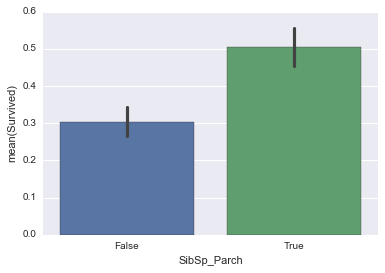

In [23]:
sns.barplot(x="SibSp_Parch", y="Survived", data=data);

Having a sibling/spouse/parent or child would increase the mean survival from 0.303 to .505

###  Understanding Age as a factor

In [24]:
print(grouped_by_factors(data,'Age').head())
print(grouped_by_factors(data,'Age').tail())

              Fare  Parch  PassengerId  Pclass  SibSp  Survived
Age                                                            
0.42 count  1.0000    1.0          1.0     1.0    1.0       1.0
     mean   8.5167    1.0        804.0     3.0    0.0       1.0
     std       NaN    NaN          NaN     NaN    NaN       NaN
     min    8.5167    1.0        804.0     3.0    0.0       1.0
     25%    8.5167    1.0        804.0     3.0    0.0       1.0
          Fare  Parch  PassengerId  Pclass  SibSp  Survived
Age                                                        
80.0 min  30.0    0.0        631.0     1.0    0.0       1.0
     25%  30.0    0.0        631.0     1.0    0.0       1.0
     50%  30.0    0.0        631.0     1.0    0.0       1.0
     75%  30.0    0.0        631.0     1.0    0.0       1.0
     max  30.0    0.0        631.0     1.0    0.0       1.0


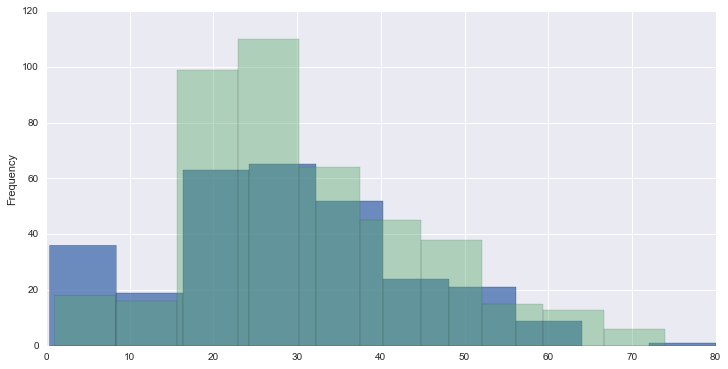

In [25]:
surv_age = data[data['Survived'] == 1]
surv_age['Age'].plot(kind='hist', figsize=[12,6], alpha=.8)
notsurv_age = data[data['Survived'] == 0]
notsurv_age['Age'].plot(kind='hist', figsize=[12,6], alpha=.4)

Age of the passengers ranged from 0 to 80 years. Green bar is for passengers who did not survive and the blue is for those who survived. The distribution is almost normal distribution with similar shape and mode around 20 years. Below is the correlation for Age vs mean survived, it shows slight negative correlation with pearson'r value of -0.077

#### Correlation of 'Survived' with Age

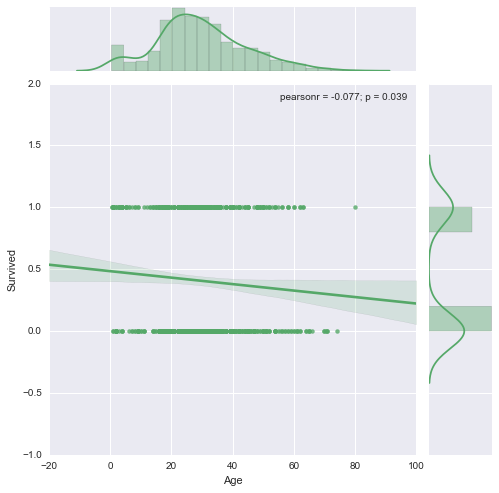

In [26]:
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot("Age", "Survived", data=data, kind="reg",color="g", size=7)

#### Correlation of 'Survived' with Age and Sex

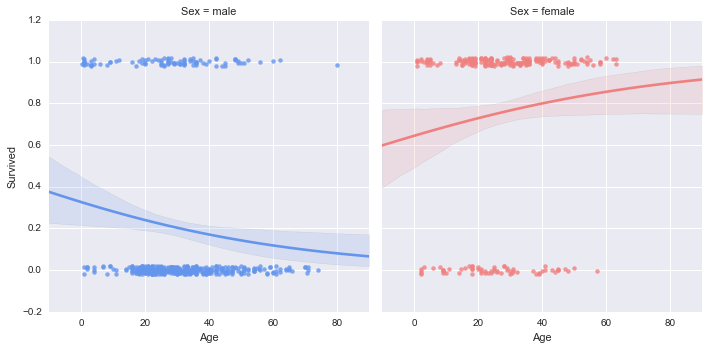

In [81]:
pal = dict(male="#6495ED", female="#F08080")
g = sns.lmplot(x="Age", y="Survived", col="Sex", hue="Sex", data=data, palette=pal, y_jitter=.02, logistic=True)

Survival probability was higher for Younger Men and Older Women

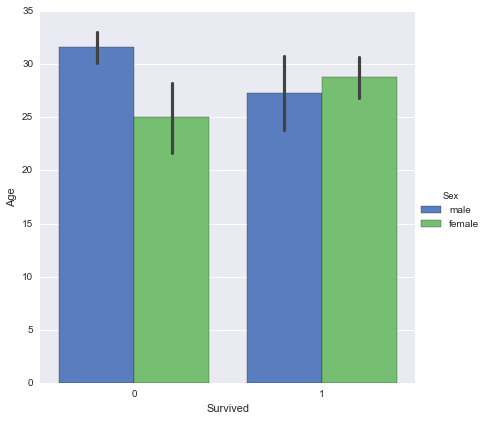

In [28]:
g = sns.factorplot(x="Survived", y="Age", hue="Sex", data=data,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Age")

Side by side comparison of males and females by age further supports that. After looking at all the data and the distribution


## Hypothesis testing

I have a hypothesis that passengers that are lower in age(<15 years) had greater chance of survival than females.

Null Hypothesis would be that the difference in chances of survival of passengers greater or lower than 15 years is not significant and alternate would be that it is significant.

                            H0: µchild = µfemale at α = 0.05, 
                            HA: µchild ≠ µfemale at α = 0.05, where α is the t-critical at which the probability is .05 and µchild and µfemale are population means for the two groups.

In [62]:
#Children under 15yrs of age
data_children = data[data['Age'] <= 15]

In [63]:
#Females of age greater than 15 years
data_female = data[(data['Sex'] == 'female') & (data['Age'] > 15)]

In [64]:
scipy.stats.ttest_ind(data_children['Survived'], data_female['Survived'], axis=0, equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=-3.0179972825078307, pvalue=0.0030663424375674069)

#### Conclusion- since p value is low, the difference in mean survival is significant for females vs. children. Negative t-statistic shows that the mean survival of females is more than that of children